In [ ]:
# Data from International Coffee Organization (ICO)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/historical_data/3b - Retail prices.csv')

In [3]:
data.head(5)

,Retail prices of roasted coffee in selected importing countries,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,In US$/lb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Calendar years,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,European Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# set the 3rd row as the header
data.columns = data.iloc[2,]

In [5]:
# drop first rows 
data = data[5:]

In [6]:
# defining new column names

newcols = ['importing_country']

intcols = [int(col) for col in data.columns[1:]]

for i in intcols:
    newcols.append(i)

data.columns = newcols

In [7]:
# resetting the index after row deletion
data.reset_index(inplace=True)

# dropping the index column
data.drop(columns='index',inplace=True)

In [8]:
# deleting a bunch of useless rows filled with NaN that have been read from the CSV file

for row in range(data.shape[0]):
    
    # some rows are NaN, hence floats, and so the for loop will not iterate through them
    # hence we enclose it in try-except statement, and if there's a float error continue to next iteration
    
    try:
        if 'Soluble coffee' in data.loc[row, 'importing_country']:
            data.drop(data.index[row:], inplace=True)
            break
    except:
        continue

In [9]:
# making the dates the row index and the countires the columns
data = data.T

In [10]:
# resetting the column names

data.rename(columns=data.iloc[0], inplace=True)

data = data[1:]

In [11]:
# we have one or more columns filled only with missing values
print(np.nan in data.columns)
print('')

# finding which column is called NaN:
for i in range(len(data.columns)):
    print(i, data.columns[i])

True

0    Austria
1    Belgium
2    Bulgaria
3    Cyprus
4    Czechia
5    Denmark
6    Finland
7    France
8    Germany
9    Hungary
10    Italy
11    Latvia
12    Lithuania
13    Luxembourg
14    Malta 1
15    Netherlands
16    Poland
17    Portugal
18    Slovakia
19    Slovenia
20    Spain
21    Sweden
22 nan
23 Japan
24 Norway
25 Russian Federation
26 Switzerland
27 United Kingdom 1
28 United States of America


In [12]:
# drop column named NaN (it was an empty space between the countries' names)
data.drop(columns = np.nan, inplace=True)

# eliminating white space for some column names
data.columns = [col.strip() for col in data.columns]

In [13]:
# change column names
cntrs = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus',  'Czechia', 
         'Denmark', 'Finland', 'France',   'Germany', 'Hungary', 
         'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
         'Netherlands', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 
         'Spain', 'Sweden', 
         'Japan', 'Norway', 'Russia', 'Switzerland', 'UK', 'USA']

data.columns = cntrs

In [14]:
## For EU countries, fill in NA's with the EU countries' average for that particular year
eu = data.loc[:, data.columns[:22]]

for row in range(eu.shape[0]):
    # take the EU average for each row and rounding it
    M = eu.iloc[row,:].mean(skipna=True)
    M = round(M, 2)
    # filling missing values in EU countries with the EU average for that row
    eu.iloc[row, :].fillna(M, axis=0, inplace=True)

In [15]:
# creating a column with EU average
eu['EU'] = eu.apply(lambda x: x.mean(), axis=1)
eu['EU'] = round(eu['EU'], 2)

In [16]:
# looking at non-EU countries
data.loc[:, data.columns[22:]]

,Japan,Norway,Russia,Switzerland,UK,USA
1990,10.26,3.31,NaN,4.83,10.55,2.97
1991,11.88,3.16,NaN,4.36,10.41,2.81
1992,12.62,3.12,NaN,4.52,10.09,2.58
1993,14.57,2.46,NaN,4.27,8.44,2.47
1994,14.69,3.29,NaN,4.5,11.36,3.4
1995,17.72,4.54,NaN,6.32,13.79,4.04
1996,15.24,3.9,NaN,5.43,13.35,3.43
1997,14.22,4.11,NaN,4.79,14.9,4.11
1998,13.52,3.9,NaN,5.04,15.42,3.77
1999,15.32,3.35,NaN,4.82,14.33,3.43


In [17]:
# exclude Russia and Switzerland - they have many NaN and we don't know how to fill them
data.drop(columns=['Russia','Switzerland'], inplace=True)

In [18]:
# exclude EU countries
data = data.loc[:, data.columns[22:]]

In [19]:
# merge data and EU countries where NA's were filled
data = pd.concat([eu, data], axis=1)

In [20]:
# list of 27 colors, as the number of columns in the data set
colors = [f'tab:{color}' for color in ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']]

additional_colors = ['maroon','deepskyblue','steelblue','teal','thistle','darkorchid','mediumpurple','gold','darkgreen',
                     'burlywood','deeppink','crimson','black','dodgerblue','lawngreen','peru','darksalmon']

for color in additional_colors:
    colors.append(color)

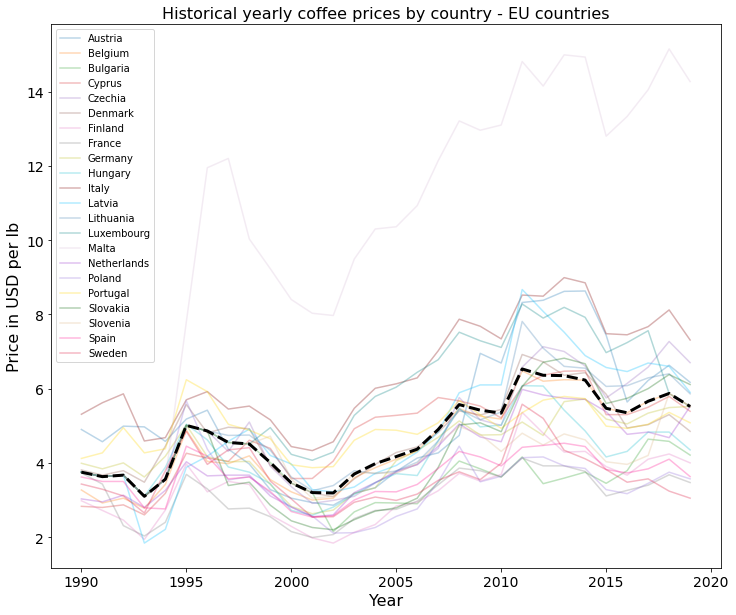

In [22]:
## plotting historical yearly coffee prices per country - EU countries
plt.figure(figsize=(12,10))

for col,color in zip(data.drop(columns=['USA','UK','Norway','Japan']).columns, colors):
    if color == 'black':
        data[col].plot(color=color, linewidth=3, style='--')
        plt.savefig('../images/plots/historical_yearly_prices_by_EU_countries.jpeg')
    else:
        data[col].plot(color=color, alpha=0.3);
        plt.legend(bbox_to_anchor = (1,1), prop = {'size':14});
        plt.ylabel('Price in USD per lb', fontsize=16)
        plt.xlabel('Year', fontsize=16)
        plt.title('Historical yearly coffee prices by country - EU countries', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.savefig('../images/plots/historical_yearly_prices_by_EU_countries.jpeg')

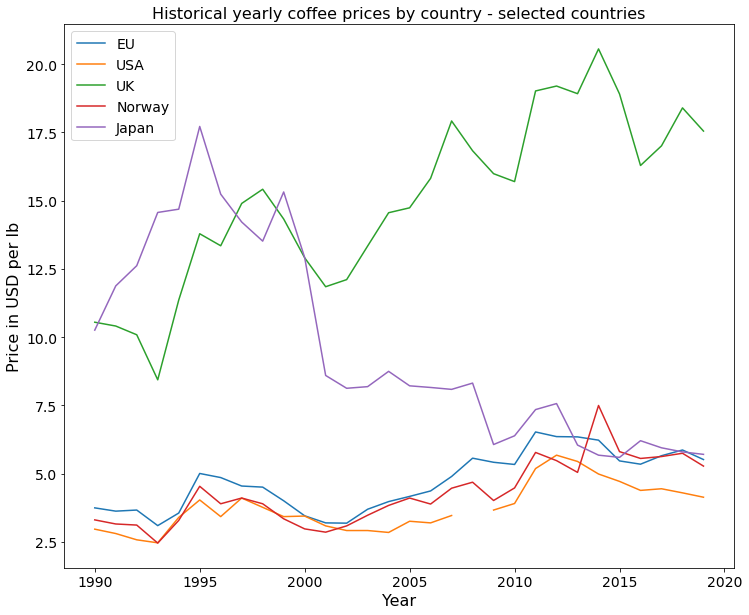

In [24]:
## plotting historical yearly coffee prices per country - selected world countries

import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

for col,color in zip(data[['EU','USA','UK','Norway','Japan']].columns, colors):
        data[col].plot(color=color);
        plt.legend(loc=2, prop={'size':14});
        plt.ylabel('Price in USD per lb', fontsize=16)
        plt.xlabel('Year', fontsize=16)
        plt.title('Historical yearly coffee prices by country - selected countries', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.savefig('../images/plots/historical_yearly_prices_by_world_countries.jpeg')

In [67]:
# Japan has a different pattern over the years, with coffee prices dropping significantly from a bit before 2000
# onwards - exclude Japan from the data set

# data.drop(columns='Japan', inplace=True)

---